# EDA on IMDB DataSet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\regex_imdb.csv")
df.head(5)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80.0,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100.0,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97
2,The Dark Knight,2008,"Action, Crime, Drama",152,9.0,84.0,2341261,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86
3,The Godfather: Part II,1974,"Crime, Drama",202,9.0,90.0,1146666,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",57.30
4,12 Angry Men,1957,"Crime, Drama",96,9.0,96.0,701882,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",4.36


In [3]:
df.shape

(1000, 10)

In [4]:
df.columns

Index(['Name', 'Year', 'Genre', 'Run_time', 'Rating', 'Meta_score', 'Votes',
       'Director', 'cast', 'Gross'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1000 non-null   object 
 1   Year        1000 non-null   int64  
 2   Genre       1000 non-null   object 
 3   Run_time    1000 non-null   int64  
 4   Rating      1000 non-null   float64
 5   Meta_score  772 non-null    float64
 6   Votes       1000 non-null   int64  
 7   Director    998 non-null    object 
 8   cast        1000 non-null   object 
 9   Gross       830 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
df.dtypes

Name           object
Year            int64
Genre          object
Run_time        int64
Rating        float64
Meta_score    float64
Votes           int64
Director       object
cast           object
Gross         float64
dtype: object

In [7]:
df.isnull().sum()

Name            0
Year            0
Genre           0
Run_time        0
Rating          0
Meta_score    228
Votes           0
Director        2
cast            0
Gross         170
dtype: int64

In [8]:
missing_value = df.isna().sum()/len(df)*100
print(missing_value)
missing_value[missing_value!=0]

Name           0.0
Year           0.0
Genre          0.0
Run_time       0.0
Rating         0.0
Meta_score    22.8
Votes          0.0
Director       0.2
cast           0.0
Gross         17.0
dtype: float64


Meta_score    22.8
Director       0.2
Gross         17.0
dtype: float64

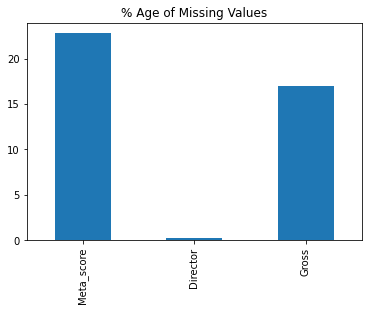

In [9]:
only_missing= missing_value[missing_value!=0]
only_missing.plot(kind="bar")
plt.title("% Age of Missing Values")
plt.show()

In [10]:
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())

In [11]:
df['Meta_score'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Meta_score, Length: 1000, dtype: bool

In [12]:
df['Meta_score'] = df["Meta_score"].apply(np.round)

In [13]:
df['Meta_score']

0       80.0
1      100.0
2       84.0
3       90.0
4       96.0
       ...  
995     76.0
996     84.0
997     85.0
998     78.0
999     93.0
Name: Meta_score, Length: 1000, dtype: float64

In [14]:
df['Meta_score'].astype

<bound method NDFrame.astype of 0       80.0
1      100.0
2       84.0
3       90.0
4       96.0
       ...  
995     76.0
996     84.0
997     85.0
998     78.0
999     93.0
Name: Meta_score, Length: 1000, dtype: float64>

In [15]:
#change the datatype from float to integer
df["Meta_score"]= df['Meta_score'].astype("int")
df["Meta_score"].astype

<bound method NDFrame.astype of 0       80
1      100
2       84
3       90
4       96
      ... 
995     76
996     84
997     85
998     78
999     93
Name: Meta_score, Length: 1000, dtype: int32>

# Univariate Analysis

In [16]:
df.head(5)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97
2,The Dark Knight,2008,"Action, Crime, Drama",152,9.0,84,2341261,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86
3,The Godfather: Part II,1974,"Crime, Drama",202,9.0,90,1146666,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",57.30
4,12 Angry Men,1957,"Crime, Drama",96,9.0,96,701882,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",4.36


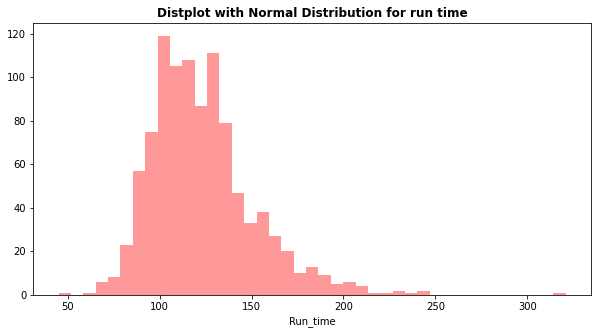

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(df['Run_time'], kde= False, color= ['red'])
plt.title("Distplot with Normal Distribution for run time", fontweight= 'bold')
plt.show()

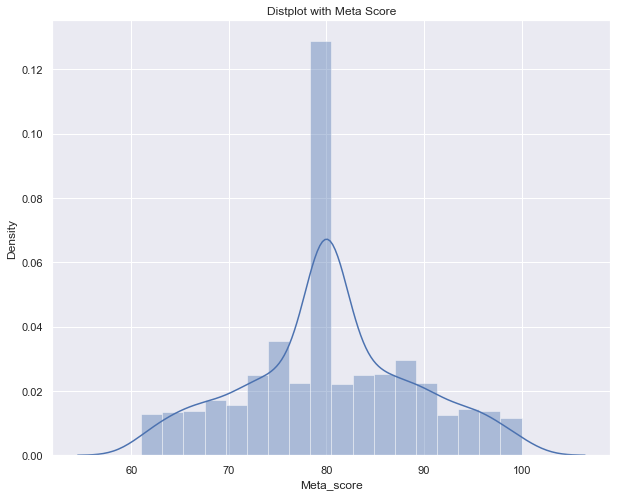

In [18]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.distplot(df["Meta_score"])
plt.title("Distplot with Meta Score")
plt.show()

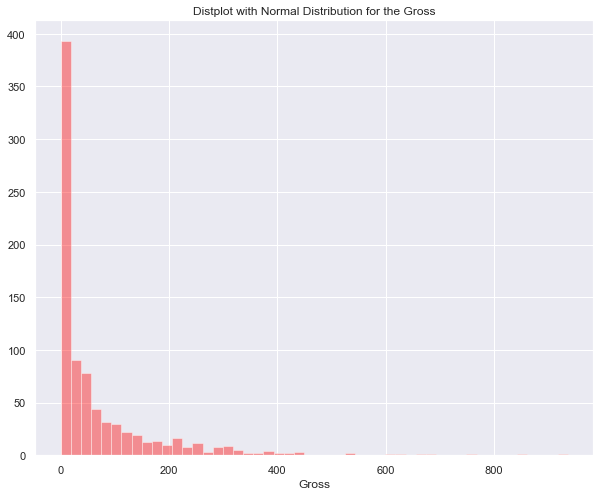

In [19]:
plt.figure(figsize=(10,8))
sns.distplot(df["Gross"], kde=False, color= ['red'])
plt.title("Distplot with Normal Distribution for the Gross")
plt.show()

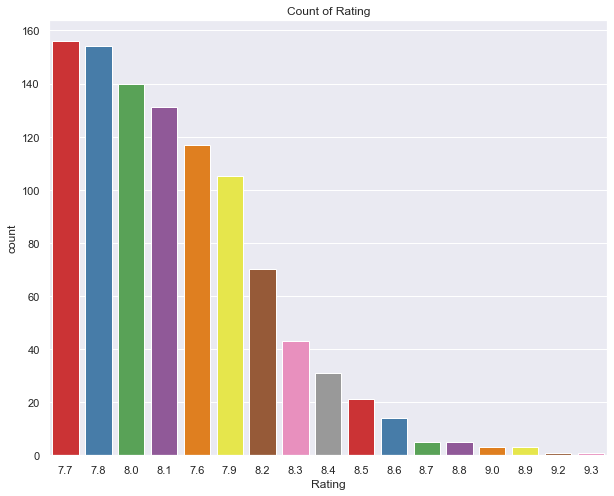

In [20]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
px = sns.countplot(x="Rating", data=df, palette= "Set1", order= df['Rating'].value_counts().index[0:])
plt.title("Count of Rating")
plt.show()

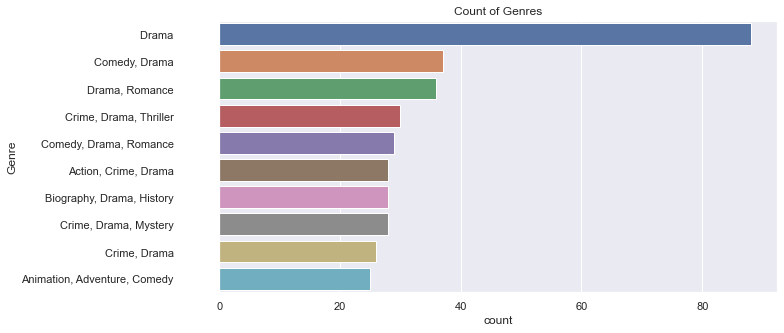

In [21]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.countplot(y= 'Genre', data=df, order= df['Genre'].value_counts(ascending= False).index[0:10])
plt.title("Count of Genres")
plt.show()

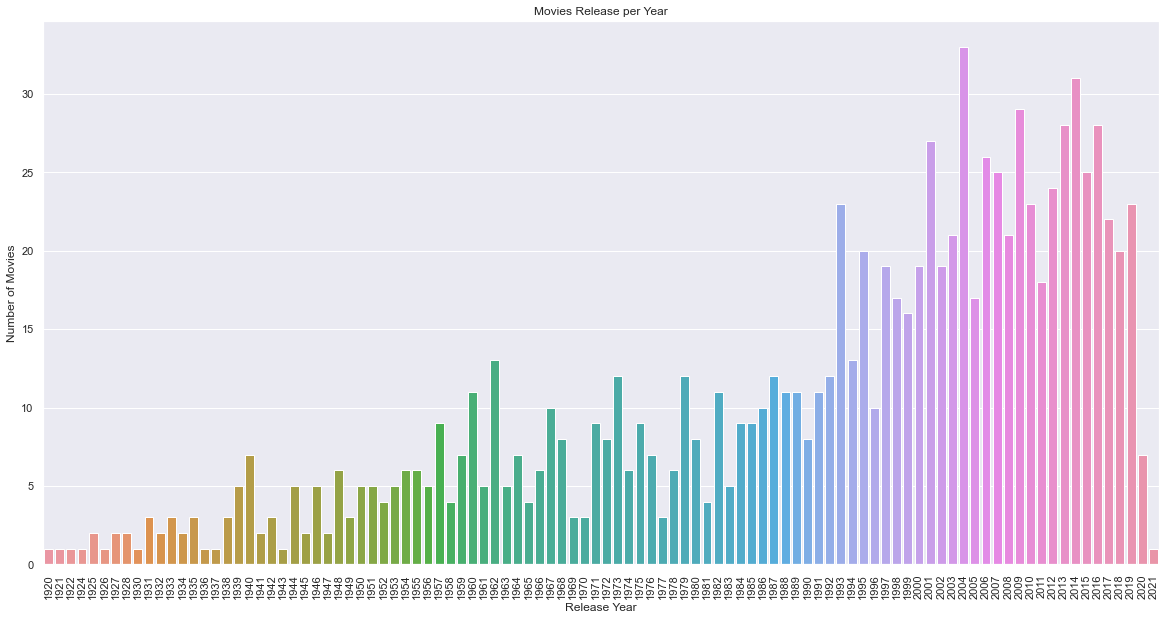

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(df['Year'])
plt.title("Movies Release per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=90)
plt.show()

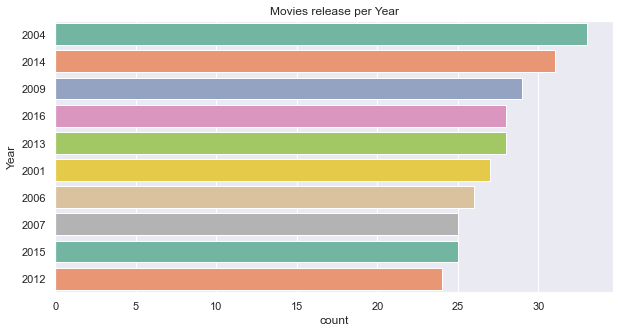

In [24]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(y= "Year", data=df, palette= "Set2", order= df['Year'].value_counts(ascending=False).index[0:10])
plt.title('Movies release per Year')
plt.show()

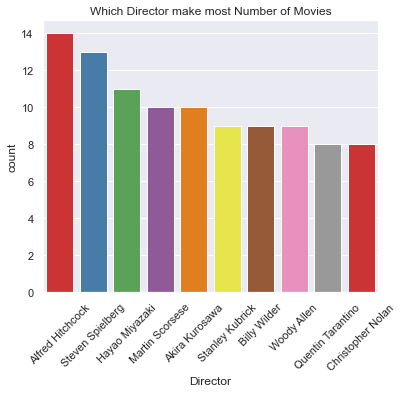

In [25]:
plt.figure(figsize=(6,5))
sns.countplot(x='Director', data=df, palette= "Set1", order= df['Director'].value_counts().index[0:10])
plt.xticks(rotation=45)
plt.title('Which Director make most Number of Movies')
plt.show()

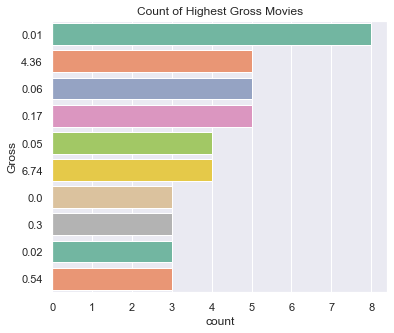

In [26]:
plt.figure(figsize=(6,5))
sns.set(style="darkgrid")
ax = sns.countplot(y='Gross', data=df, palette='Set2', order=df['Gross'].value_counts(ascending=False).index[0:10])
plt.title("Count of Highest Gross Movies")
plt.show()

# Bivariate Analysis

In [27]:
df.head()

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97
2,The Dark Knight,2008,"Action, Crime, Drama",152,9.0,84,2341261,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86
3,The Godfather: Part II,1974,"Crime, Drama",202,9.0,90,1146666,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",57.30
4,12 Angry Men,1957,"Crime, Drama",96,9.0,96,701882,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",4.36


In [28]:
pd.crosstab(df['Run_time'], df["Year"]).mean()

Year
1920    0.007143
1921    0.007143
1922    0.007143
1924    0.007143
1925    0.014286
          ...   
2017    0.157143
2018    0.142857
2019    0.164286
2020    0.050000
2021    0.007143
Length: 100, dtype: float64

In [29]:
avg = df['Run_time'].groupby(df['Year']).describe()

In [30]:
avg

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1920,1.0,76.000000,NaN,76.0,76.00,76.0,76.00,76.0
1921,1.0,68.000000,NaN,68.0,68.00,68.0,68.00,68.0
1922,1.0,94.000000,NaN,94.0,94.00,94.0,94.00,94.0
1924,1.0,45.000000,NaN,45.0,45.00,45.0,45.00,45.0
1925,2.0,85.000000,14.142136,75.0,80.00,85.0,90.00,95.0
...,...,...,...,...,...,...,...,...
2017,22.0,121.590909,20.129720,94.0,105.25,114.0,133.50,167.0
2018,20.0,130.200000,17.887367,101.0,118.75,132.0,138.25,170.0
2019,23.0,132.130435,26.654872,96.0,116.00,130.0,140.00,209.0


In [31]:
avg_runtime= avg["mean"]
avg_runtime_min = avg["mean"] - avg["std"]
avg_runtime_max = avg["mean"] + avg["std"]

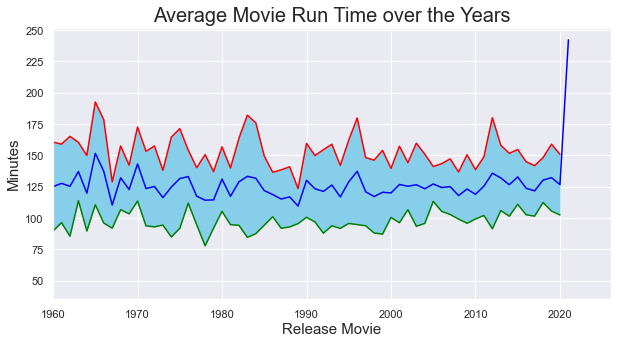

In [32]:
fig, x= plt.subplots(figsize=(10,5))
x.plot(avg_runtime, color= 'blue')
x.plot(avg_runtime_min, color= 'green')
x.plot(avg_runtime_max, color= 'red')
x.fill_between(avg.index, avg_runtime_min, avg_runtime_max, color= "skyblue")
x.set_title("Average Movie Run Time over the Years", fontsize= 20)
x.set_xlabel("Release Movie", fontsize= 15)
x.set_ylabel("Minutes", fontsize= 15)
x.set_xlim(1960)
plt.show()

In [33]:
movies_by_decades = df.copy()

In [34]:
movies_by_decades.head(5)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97
2,The Dark Knight,2008,"Action, Crime, Drama",152,9.0,84,2341261,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86
3,The Godfather: Part II,1974,"Crime, Drama",202,9.0,90,1146666,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",57.30
4,12 Angry Men,1957,"Crime, Drama",96,9.0,96,701882,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",4.36


In [35]:
movies_by_decades["Year"] = ((movies_by_decades["Year"]//10)*10).astype("int64")

In [36]:
movies_by_decades.Year.head(5)

0    1990
1    1970
2    2000
3    1970
4    1950
Name: Year, dtype: int64

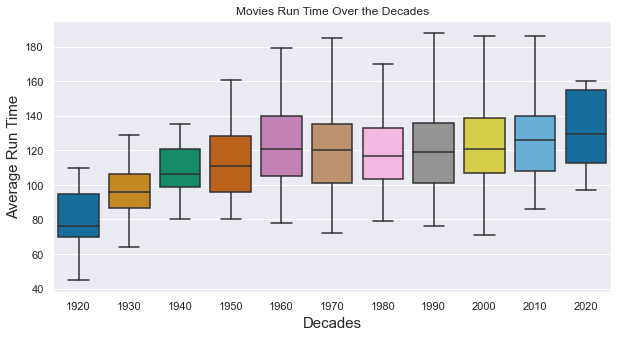

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Year", y="Run_time", data=movies_by_decades, palette= 'colorblind', showfliers= False)
plt.title("Movies Run Time Over the Decades")
plt.xlabel("Decades", fontsize= 15)
plt.ylabel("Average Run Time", fontsize= 15)
plt.show()

In [38]:
movies_by_decades["Year"]

0      1990
1      1970
2      2000
3      1970
4      1950
       ... 
995    1960
996    1950
997    1950
998    1940
999    1930
Name: Year, Length: 1000, dtype: int64

In [39]:
df.groupby(by= df["Year"])["Run_time"].mean()

Year
1920     76.000000
1921     68.000000
1922     94.000000
1924     45.000000
1925     85.000000
           ...    
2017    121.590909
2018    130.200000
2019    132.130435
2020    126.571429
2021    242.000000
Name: Run_time, Length: 100, dtype: float64

In [40]:
df.head(5)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97
2,The Dark Knight,2008,"Action, Crime, Drama",152,9.0,84,2341261,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86
3,The Godfather: Part II,1974,"Crime, Drama",202,9.0,90,1146666,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",57.30
4,12 Angry Men,1957,"Crime, Drama",96,9.0,96,701882,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",4.36


In [41]:
v= df.groupby(df["Year"])["Votes"].mean().reset_index()

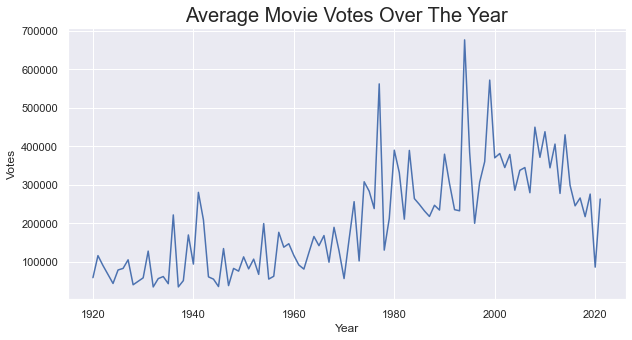

In [42]:
plt.figure(figsize= (10,5))
sns.lineplot(x= "Year", y= "Votes", data= v)
plt.title("Average Movie Votes Over The Year", fontsize= 20)
plt.show()

In [43]:
df['Genre']

0                         Drama            
1                  Crime, Drama            
2          Action, Crime, Drama            
3                  Crime, Drama            
4                  Crime, Drama            
                       ...                 
995      Comedy, Drama, Romance            
996              Drama, Western            
997         Drama, Romance, War            
998                  Drama, War            
999    Crime, Mystery, Thriller            
Name: Genre, Length: 1000, dtype: object

In [44]:
df.groupby(df['Genre'])['Year'].sum().sort_values()

Genre
Fantasy, Horror, Mystery                   1920
Fantasy, Horror                            1922
Adventure, Horror, Sci-Fi                  1933
Comedy, Musical, War                       1933
Comedy, Crime, Mystery                     1934
                                          ...  
Comedy, Drama, Romance                    57659
Crime, Drama, Thriller                    59884
Drama, Romance                            71804
Comedy, Drama                             73819
Drama                                    175463
Name: Year, Length: 202, dtype: int64

In [45]:
vot = df.groupby(df['Name'])['Votes'].max().sort_values()[-10:].reset_index()

In [46]:
vot

,Name,Votes
0,The Godfather,1646818
1,The Lord of the Rings: The Return of the King,1663902
2,The Lord of the Rings: The Fellowship of the Ring,1683989
3,The Matrix,1700513
4,Forrest Gump,1838908
5,Pulp Fiction,1852195
6,Fight Club,1881336
7,Inception,2099854
8,The Dark Knight,2341261
9,The Shawshank Redemption,2377480


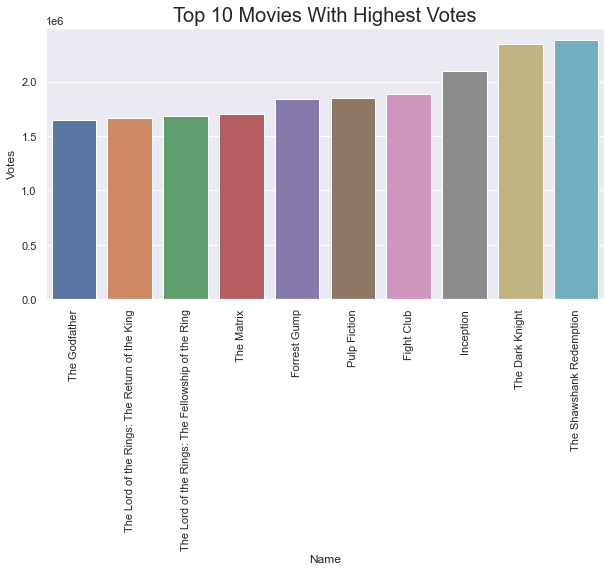

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(x=vot['Name'], y=vot['Votes'])
plt.xticks(rotation=90)
plt.title("Top 10 Movies With Highest Votes", fontsize=20)
plt.show()

<AxesSubplot:xlabel='Votes', ylabel='Rating'>

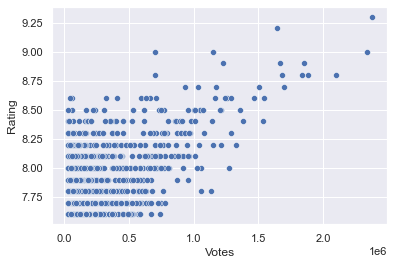

In [49]:
sns.scatterplot(y='Rating', x='Votes', data=df)

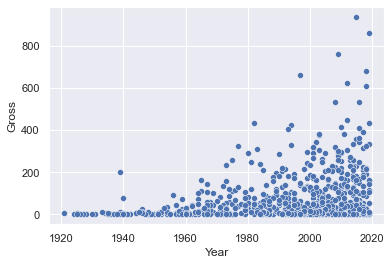

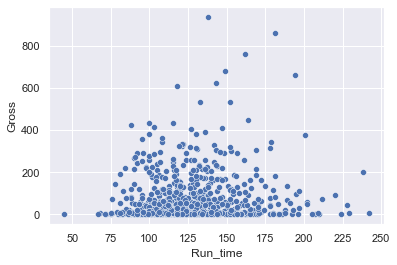

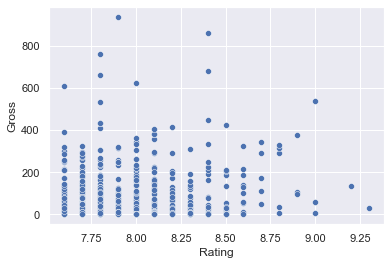

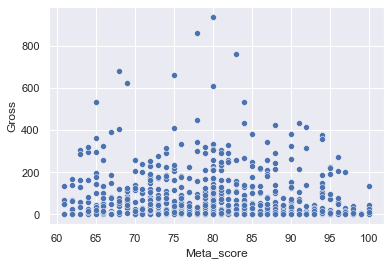

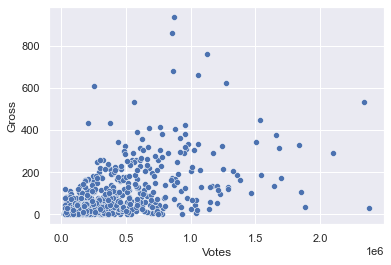

In [52]:
c = ['Year', 'Run_time', 'Rating', 'Meta_score', 'Votes']

for a in c:
    sns.scatterplot(y='Gross', x= a, data=df)
    
    plt.show()

In [53]:
bo = df[['Genre', 'Gross']].sort_values('Genre')[-10:]

In [54]:
bo

,Genre,Gross
425,"Mystery, Thriller",4.08
145,"Mystery, Thriller",128.01
964,"Mystery, Thriller",3.80
70,"Mystery, Thriller",25.54
905,"Mystery, Thriller",NaN
706,Thriller,17.55
697,Western,31.80
181,Western,15.00
12,Western,6.10
48,Western,5.32


In [55]:
gross = df.groupby(df['Genre'])['Gross'].sum().sort_values()[-5:].reset_index()

In [56]:
gross

,Genre,Gross
0,Drama,2019.22
1,"Action, Adventure, Fantasy",2116.35
2,"Action, Adventure, Drama",2668.85
3,"Animation, Adventure, Comedy",4543.78
4,"Action, Adventure, Sci-Fi",5898.67


<AxesSubplot:xlabel='Genre', ylabel='Gross'>

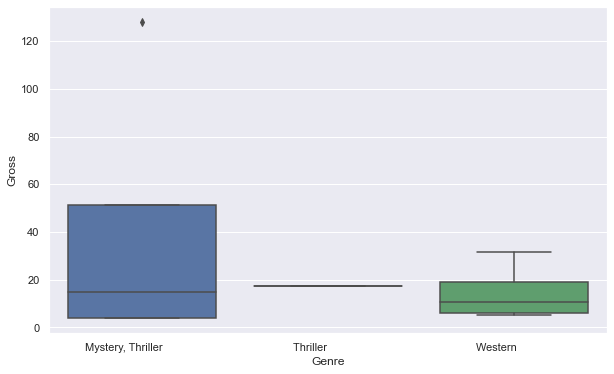

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Genre', y='Gross', data=bo)

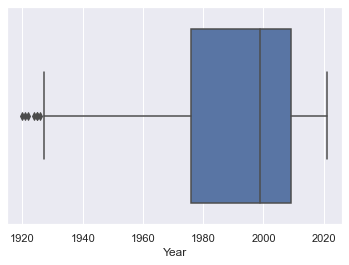

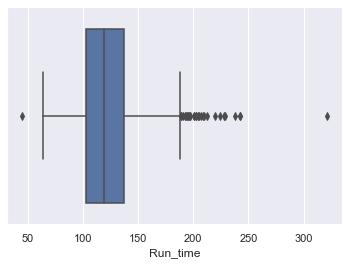

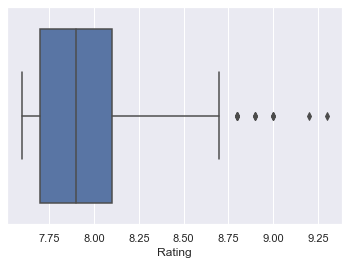

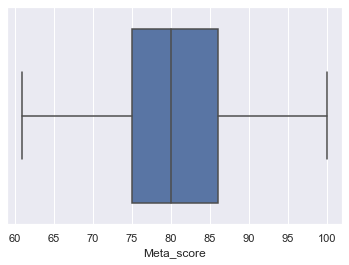

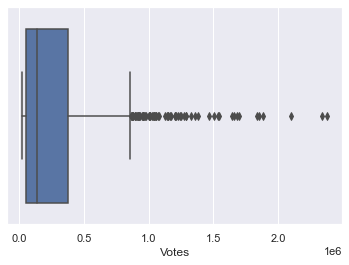

In [59]:
c= ['Year', 'Run_time', 'Rating', 'Meta_score', 'Votes']
for a in c:
    sns.boxplot(x=a, data=df)
    
    plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


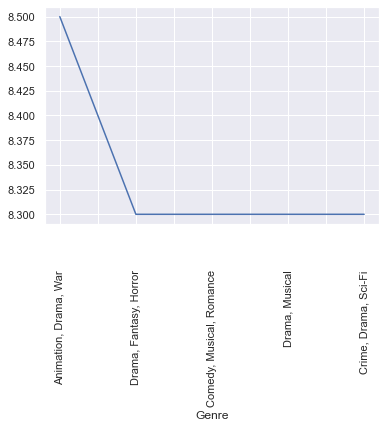

In [61]:
p = df.groupby(df["Genre"])['Rating'].min().sort_values(ascending=False).head(5).plot(kind="line")

plt.xticks(rotation=90)
print(p)

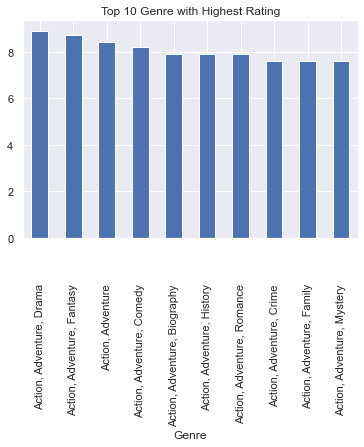

In [63]:
df.groupby(df['Genre'])['Rating'].max().head(10).sort_values(ascending= False).plot(kind= "bar")
plt.title("Top 10 Genre with Highest Rating")
plt.show()

In [64]:
df.head(10)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97
2,The Dark Knight,2008,"Action, Crime, Drama",152,9.0,84,2341261,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86
3,The Godfather: Part II,1974,"Crime, Drama",202,9.0,90,1146666,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",57.30
4,12 Angry Men,1957,"Crime, Drama",96,9.0,96,701882,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",4.36
5,The Lord of the Rings: The Return of the King,2003,"Action, Adventure, Drama",201,8.9,94,1663902,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",377.85
6,Pulp Fiction,1994,"Crime, Drama",154,8.9,94,1852195,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",107.93
7,Schindler's List,1993,"Biography, Drama, History",195,8.9,94,1229549,Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro...",96.90
8,Inception,2010,"Action, Adventure, Sci-Fi",148,8.8,74,2099854,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",292.58
9,Fight Club,1999,Drama,139,8.8,66,1881336,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier",37.03


In [65]:
dd = pd.DataFrame()
dd["cast"] = np.hstack([np.array(i.split(',')) for i in df.cast])

In [66]:
dd.head(5)

,cast
0,Tim Robbins
1,Morgan Freeman
2,Bob Gunton
3,William Sadler
4,Marlon Brando


In [70]:
df.Genre.head(5)

0                   Drama            
1            Crime, Drama            
2    Action, Crime, Drama            
3            Crime, Drama            
4            Crime, Drama            
Name: Genre, dtype: object

In [67]:
#split the Genre column in different columns
xx = pd.DataFrame()
xx['gen'] = np.hstack([np.array(x.split(",")) for x in df.Genre])

In [68]:
xx

,gen
0,Drama
1,Crime
2,Drama
3,Action
4,Crime
...,...
2529,Drama
2530,War
2531,Crime
2532,Mystery


In [69]:
xx['gen']= xx['gen'].str.strip()

In [71]:
xx['gen'].value_counts()

Drama        723
Comedy       231
Crime        210
Adventure    195
Action       186
Thriller     140
Romance      124
Biography    107
Mystery       99
Animation     83
Fantasy       68
Sci-Fi        67
History       56
Family        54
War           51
Music         34
Horror        33
Western       20
Sport         19
Film-Noir     19
Musical       15
Name: gen, dtype: int64

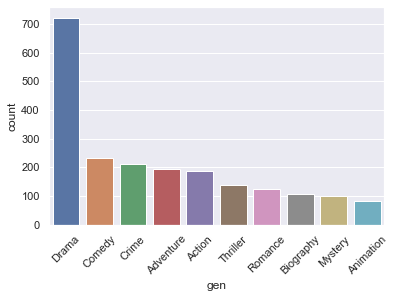

In [73]:
sns.countplot(x='gen', data=xx, order=xx['gen'].value_counts().index[0:10])
plt.xticks(rotation=45)
plt.show()

In [74]:
dd

,cast
0,Tim Robbins
1,Morgan Freeman
2,Bob Gunton
3,William Sadler
4,Marlon Brando
...,...
3995,William Bendix
3996,Robert Donat
3997,Madeleine Carroll
3998,Lucie Mannheim


In [75]:
df.head(2)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97


In [76]:
df['cast'].value_counts()

Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon        2
Mark Hamill, Harrison Ford, Carrie Fisher, Billy Dee Williams      2
Christian Bale, Tom Hardy, Anne Hathaway, Gary Oldman              1
Elliott Gould, Nina van Pallandt, Sterling Hayden, Mark Rydell     1
John Wayne, Jeffrey Hunter, Vera Miles, Ward Bond                  1
                                                                  ..
Paddy Considine, Samantha Morton, Djimon Hounsou, Sarah Bolger     1
Jean Servais, Carl Möhner, Robert Manuel, Janine Darcey            1
Orson Welles, Joseph Cotten, Dorothy Comingore, Agnes Moorehead    1
Mario Casas, Ana Wagener, Jose Coronado, Bárbara Lennie            1
Clint Eastwood, Andrew Robinson, Harry Guardino, Reni Santoni      1
Name: cast, Length: 998, dtype: int64

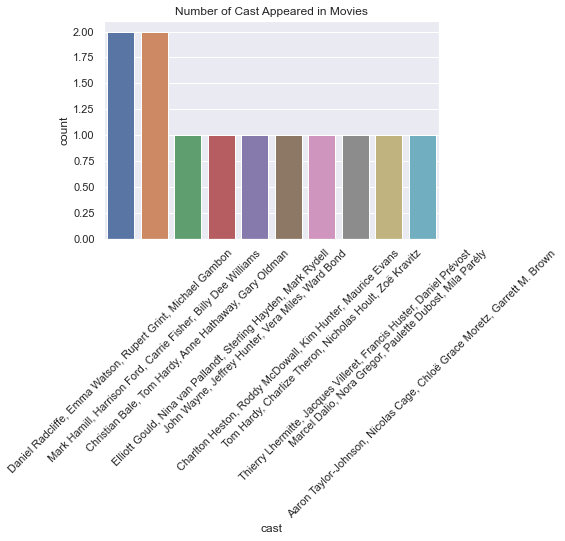

In [77]:
sns.countplot(x= "cast", data= df, order=df['cast'].value_counts().index[0:10])
plt.xticks(rotation=45)
plt.title("Number of Cast Appeared in Movies")
plt.show()

In [78]:
import plotly.graph_objects as go

In [79]:
nam = df.groupby(df['Name'])["Gross"].max().sort_values(ascending= False).head(10).reset_index()

In [80]:
nam

,Name,Gross
0,Star Wars: Episode VII - The Force Awakens,936.66
1,Avengers: Endgame,858.37
2,Avatar,760.51
3,Avengers: Infinity War,678.82
4,Titanic,659.33
5,The Avengers,623.28
6,Incredibles 2,608.58
7,The Dark Knight,534.86
8,Rogue One,532.18
9,The Dark Knight Rises,448.14


In [81]:
nam["Gross"]

0    936.66
1    858.37
2    760.51
3    678.82
4    659.33
5    623.28
6    608.58
7    534.86
8    532.18
9    448.14
Name: Gross, dtype: float64

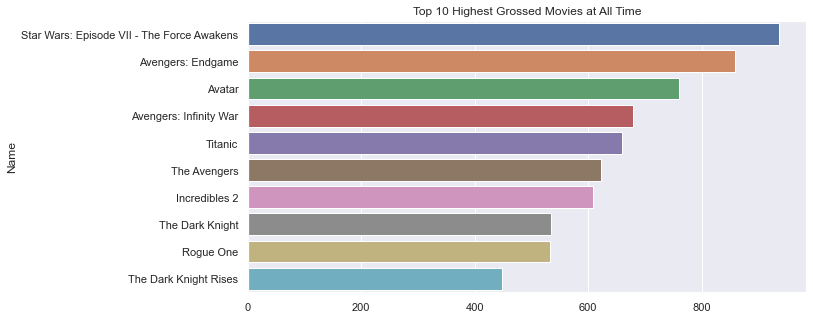

In [82]:
plt.figure(figsize=(10,5))


x= df.groupby(df['Name'])["Gross"].max().sort_values(ascending= False).head(10)
sns.barplot(x.values, x.index)
plt.title("Top 10 Highest Grossed Movies at All Time")
plt.show()

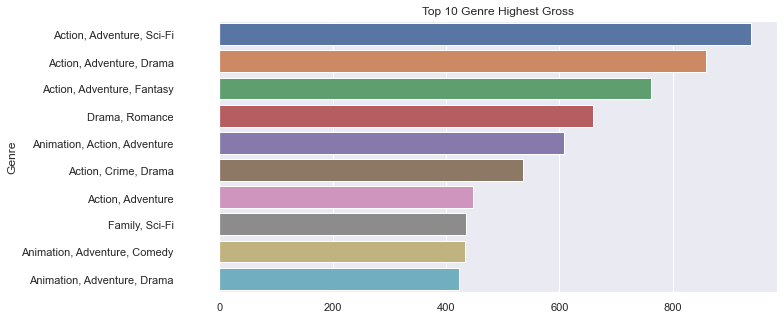

In [85]:
plt.figure(figsize=(10,5))
x = df.groupby(df['Genre'])["Gross"].max().sort_values(ascending= False).head(10)
sns.barplot(x.values, x.index)
plt.title("Top 10 Genre Highest Gross")
plt.show()

In [86]:
df[df['Name']== "Star Wars: Episode VII - The Force Awakens"]

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
480,Star Wars: Episode VII - The Force Awakens,2015,"Action, Adventure, Sci-Fi",138,7.9,80,868284,Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",936.66


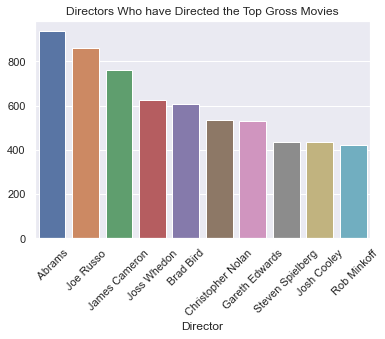

In [89]:
x = df.groupby(by = df['Director'])['Gross'].max().sort_values(ascending= False).head(10)
plt.title("Directors Who have Directed the Top Gross Movies")
y = sns.barplot(x.index, x.values)
y.set_label("Directors")
plt.xticks(rotation=45)
plt.show()

In [90]:
df.groupby(df['cast'])['Gross'].max().sort_values(ascending= False).head(5)


cast
Daisy Ridley, John Boyega, Oscar Isaac, Domhnall Gleeson              936.66
Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth         858.37
Sam Worthington, Zoe Saldana, Sigourney Weaver, Michelle Rodriguez    760.51
Robert Downey Jr., Chris Hemsworth, Mark Ruffalo, Chris Evans         678.82
Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates              659.33
Name: Gross, dtype: float64

# Multi-Variate Analysis

<AxesSubplot:>

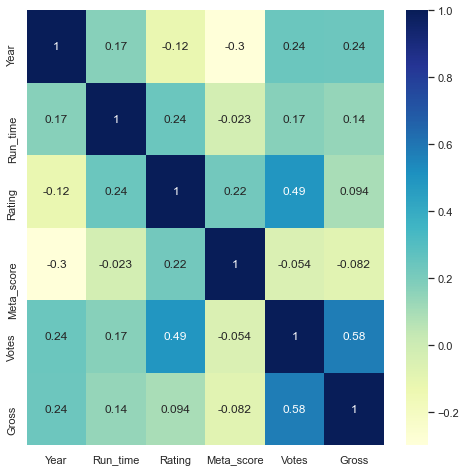

In [91]:
plt.figure(figsize=[8,8])
sns.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')

In [92]:
top_10_movies = df[["Name", 'Gross']].sort_values("Gross")[-10:].reset_index()

In [93]:
top_10_movies

,index,Name,Gross
0,905,El cuerpo,NaN
1,915,Celda 211,NaN
2,919,Die Welle,NaN
3,948,Batoru rowaiaru,NaN
4,961,Funny Games,NaN
5,988,Watership Down,NaN
6,995,Breakfast at Tiffany's,NaN
7,996,Giant,NaN
8,998,Lifeboat,NaN
9,999,The 39 Steps,NaN


In [94]:
xx = df[["Name", "Gross", "Director"]].sort_values("Gross")[-10:].reset_index()

In [95]:
xx

,index,Name,Gross,Director
0,905,El cuerpo,NaN,Oriol Paulo
1,915,Celda 211,NaN,n
2,919,Die Welle,NaN,Dennis Gansel
3,948,Batoru rowaiaru,NaN,Kinji Fukasaku
4,961,Funny Games,NaN,Michael Haneke
5,988,Watership Down,NaN,John Hubley
6,995,Breakfast at Tiffany's,NaN,Blake Edwards
7,996,Giant,NaN,George Stevens
8,998,Lifeboat,NaN,Alfred Hitchcock
9,999,The 39 Steps,NaN,Alfred Hitchcock


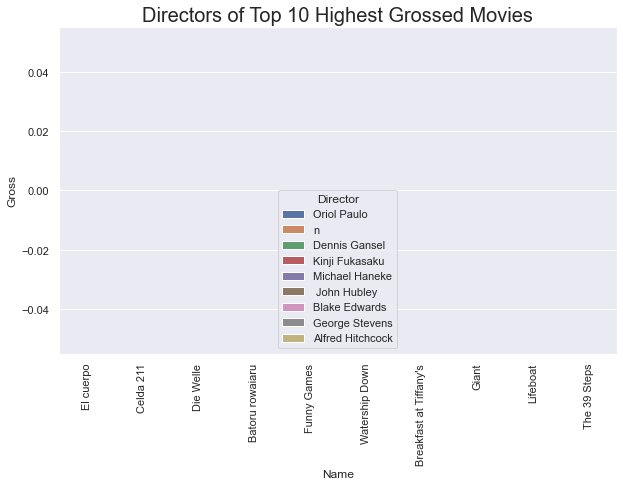

In [97]:
plt.figure(figsize=(10,6))
sns.barplot(x="Name", y= "Gross", hue= "Director", data= xx)
plt.title("Directors of Top 10 Highest Grossed Movies", fontsize= 20)
plt.xticks(rotation=90)
plt.show()